In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
# IMDB 데이터셋에서처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10,000개로 제한
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [3]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [4]:
# IMDB 리뷰처럼 각 샘플은 정수 리스트 (단어 인덱스)
print(train_data[10])

# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수
print(train_labels[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


In [6]:
#훈련 데이터를 원핫코딩 벡터로 변환
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [7]:
#훈련 레이블을 원핫코딩 벡터로 변환
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 101us/step - loss: 2.6624 - accuracy: 0.5076 - val_loss: 1.7646 - val_accuracy: 0.6290
Epoch 2/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.4628 - accuracy: 0.6952 - val_loss: 1.3418 - val_accuracy: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.0779 - accuracy: 0.7717 - val_loss: 1.1659 - val_accuracy: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.8524 - accuracy: 0.8198 - val_loss: 1.0641 - val_accuracy: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.6761 - accuracy: 0.8573 - val_loss: 0.9903 - val_accuracy: 0.7890
Epoch 6/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.5422 - accuracy: 0.8870 - val_loss: 0.9540 - val_accuracy: 0.7940
Epoch 7/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.4

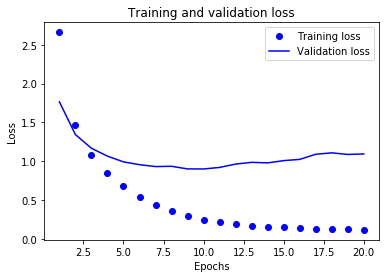

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


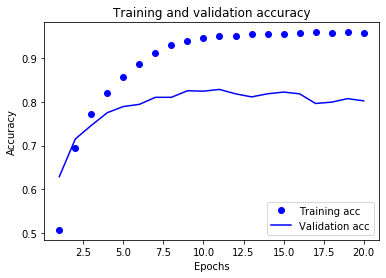

In [16]:
plt.clf()   # 그래프를 초기화합니다

#print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 92us/step - loss: 2.4871 - accuracy: 0.5442 - val_loss: 1.6632 - val_accuracy: 0.6420
Epoch 2/9
7982/7982 [==============================] - 1s 78us/step - loss: 1.3688 - accuracy: 0.7108 - val_loss: 1.3144 - val_accuracy: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 77us/step - loss: 1.0339 - accuracy: 0.7779 - val_loss: 1.1605 - val_accuracy: 0.7370
Epoch 4/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.8198 - accuracy: 0.8250 - val_loss: 1.0510 - val_accuracy: 0.7720
Epoch 5/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.6519 - accuracy: 0.8568 - val_loss: 1.0322 - val_accuracy: 0.7770
Epoch 6/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.5214 - accuracy: 0.8896 - val_loss: 0.9485 - val_accuracy: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.4196 - acc

In [22]:
# 데이터 테스트
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.argmax(predictions[0]))

(46,)
3


In [19]:
# 은닉 층의 노드 수를 출력 노드수에 비해 줄이면 안되는 이유 테스트
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=128, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 126us/step - loss: 2.6986 - accuracy: 0.4153 - val_loss: 2.0011 - val_accuracy: 0.5380
Epoch 2/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.7516 - accuracy: 0.5709 - val_loss: 1.6126 - val_accuracy: 0.5840
Epoch 3/9
7982/7982 [==============================] - 1s 120us/step - loss: 1.4406 - accuracy: 0.6027 - val_loss: 1.4607 - val_accuracy: 0.6130
Epoch 4/9
7982/7982 [==============================] - 1s 116us/step - loss: 1.2438 - accuracy: 0.6404 - val_loss: 1.3692 - val_accuracy: 0.6550
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.1004 - accuracy: 0.7185 - val_loss: 1.3211 - val_accuracy: 0.6850
Epoch 6/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.9916 - accuracy: 0.7481 - val_loss: 1.2955 - val_accuracy: 0.6980
Epoch 7/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.905